── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 299 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): id, age, anaemia, creatinine_phosphokinase, diabetes, ejection_fra...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Characteristic 0 N = 203 1 1 N = 96 1 serum_sodium 137.0 (135.0, 140.0) 135.5 (133.0, 138.5) serum_creatinine 1.0 (0.9, 1.2) 1.3 (1.1, 1.9) 1 Median (Q1, Q3)

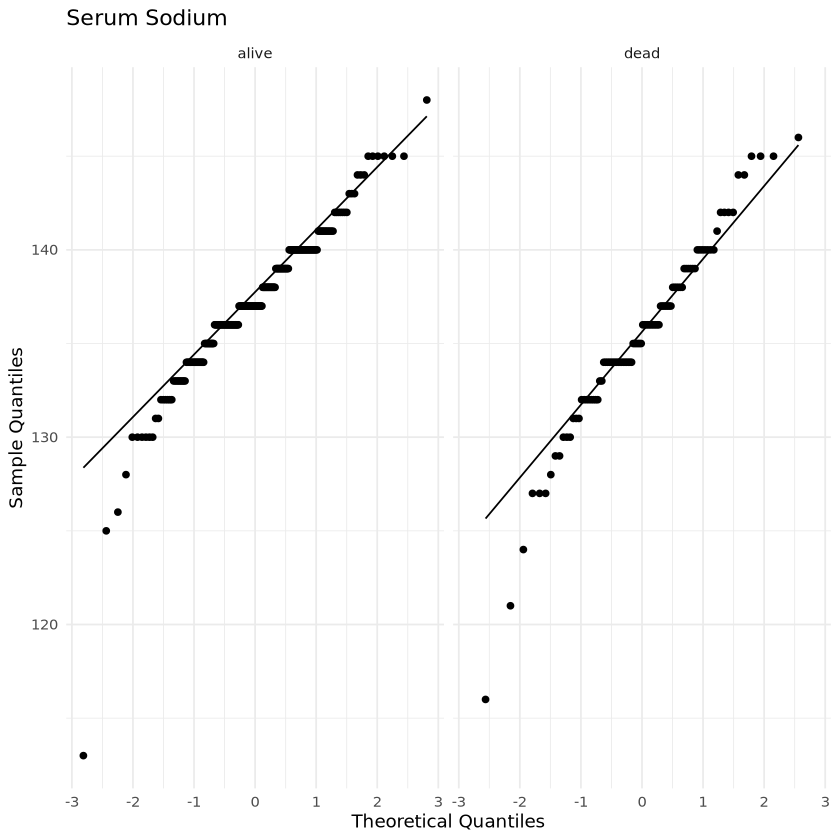

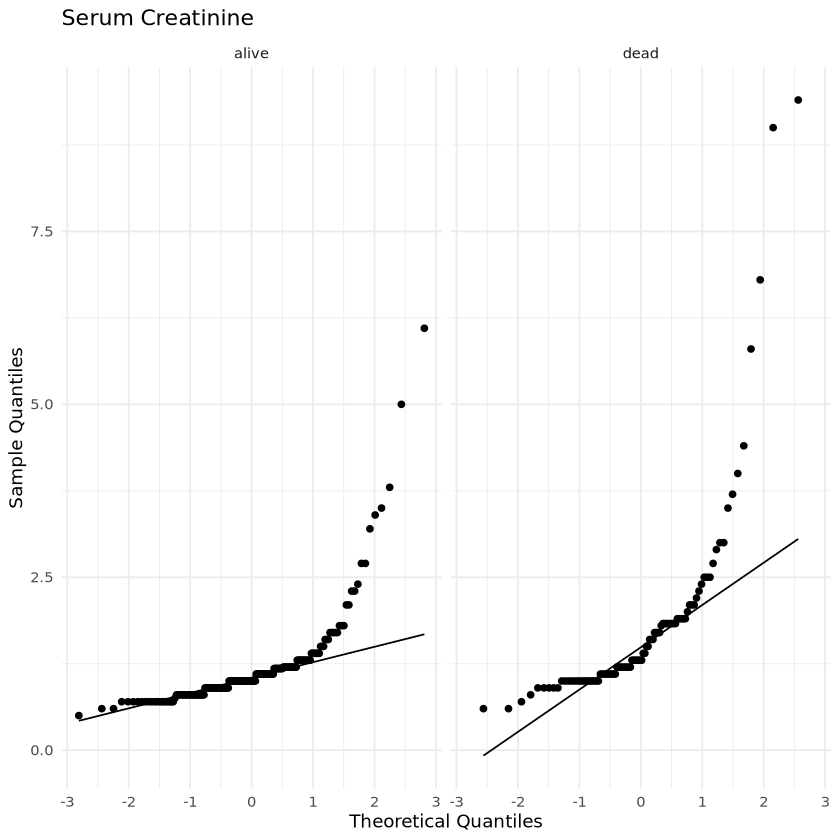

In [1]:
library(tidyverse)

# load data

data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/heart_failure.csv") %>% 
        mutate(anaemia = as.factor(anaemia),
               diabetes = as.factor(diabetes),
               high_blood_pressure = as.factor(high_blood_pressure),
               sex = as.factor(sex),
               smoking = as.factor(smoking),
               DEATH_EVENT = as.factor(DEATH_EVENT)) %>%
        select(-id, -time)

# Define function to print HTML output for gtsummary display within the notebook

print_html <- function(input) 
{
    capture.output(input) %>% 
    paste(collapse="") %>% 
    IRdisplay::display_html()
}

# 1. gtsummary table for serum_sodium and serum_creatinine by DEATH_EVENT
library(gtsummary)
library(gt)

tbl <- data %>%
  select(DEATH_EVENT, serum_sodium, serum_creatinine) %>%
  tbl_summary(
    by = DEATH_EVENT,
    statistic = all_continuous() ~  "{median} ({p25}, {p75})",     #use median to maintain the stability
    digits = all_continuous() ~ 1,                                 #keep one decimal place
  ) %>%
  bold_labels()

# display as HTML
print_html(as_gt(tbl))


# 2. Individual QQ plots with ggplot2
# Relabel groups as alive and dead
data_plot <- data %>%
  mutate(DEATH_EVENT = forcats::fct_recode(DEATH_EVENT, "alive" = "0", "dead" = "1"))

library(ggplot2)

# QQ plot: serum_sodium (individual)
ggplot(filter(data_plot, !is.na(serum_sodium)), aes(sample = serum_sodium)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~ DEATH_EVENT) +
  labs(
    title = "Serum Sodium",
    x = "Theoretical Quantiles", y = "Sample Quantiles"
  ) +
  theme_minimal()

# QQ plot: serum_creatinine (individual)
ggplot(filter(data_plot, !is.na(serum_creatinine)), aes(sample = serum_creatinine)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~ DEATH_EVENT) +
  labs(
    title = "Serum Creatinine",
    x = "Theoretical Quantiles", y = "Sample Quantiles"
  ) +
  theme_minimal()